**EDA GROCERIES 2**

Imports

In [2]:
import boto3
import os
from dotenv import load_dotenv
from botocore.exceptions import ClientError
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Downloading data

In [3]:
# load_dotenv()

# def download_file_from_s3(bucket_name, file_key, download_path):
#     # Create a session using your AWS credentials
#     session = boto3.Session(
#         aws_access_key_id=os.getenv('AWS_ACCESS_KEY_ID'),
#         aws_secret_access_key=os.getenv('AWS_SECRET_ACCESS_KEY'),
#         region_name=os.getenv('AWS_REGION')
#     )

#     # Create an S3 client
#     s3 = session.client('s3')

#     try:
#         # Download the file
#         s3.download_file(bucket_name, file_key, download_path)
#         print(f"Downloaded {file_key} from {bucket_name} to {download_path}")
#     except Exception as e:
#         print(f"Error downloading file: {e}")


# bucket_name = 'zrive-ds-data'
# file_key = 'groceries/box_builder_dataset/feature_frame.csv'
# download_path = 'feature_frame.csv'


# download_file_from_s3(bucket_name, file_key, download_path)

In [4]:
data = pd.read_csv(r"/home/raquel/zrive-ds/src/module_2/feature_frame.csv")

First checks

In [5]:
data.shape  # (2880549, 27)
data.isnull().sum()  # No NaN values
print("Dtypes", data.info())  # int64,object,float64
target_counts = data["outcome"].value_counts()
# Disproportionate outcome
# 0.0    2847317
# 1.0      33232

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

In [6]:
data.columns

Index(['variant_id', 'product_type', 'order_id', 'user_id', 'created_at',
       'order_date', 'user_order_seq', 'outcome', 'ordered_before',
       'abandoned_before', 'active_snoozed', 'set_as_regular',
       'normalised_price', 'discount_pct', 'vendor', 'global_popularity',
       'count_adults', 'count_children', 'count_babies', 'count_pets',
       'people_ex_baby', 'days_since_purchase_variant_id',
       'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id',
       'days_since_purchase_product_type', 'avg_days_to_buy_product_type',
       'std_days_to_buy_product_type'],
      dtype='object')

It is interesting to understand how characteristics like 'product type' influence the outcome.

Product_purchase_rate = out of the total number of times a product is selected, it is the proportion of times that the product was purchased.

Top 5       product_type   outcome
0        maternity  0.000589
1     airfreshener  0.000791
2  babymilkformula  0.000821
3          nappies  0.000920
4       nappypants  0.001065
Back 5            product_type   outcome
57           homebaking  0.020012
58  snacksconfectionery  0.026277
59   kitchenrolltissues  0.034691
60              binbags  0.040990
61           toiletroll  0.062475


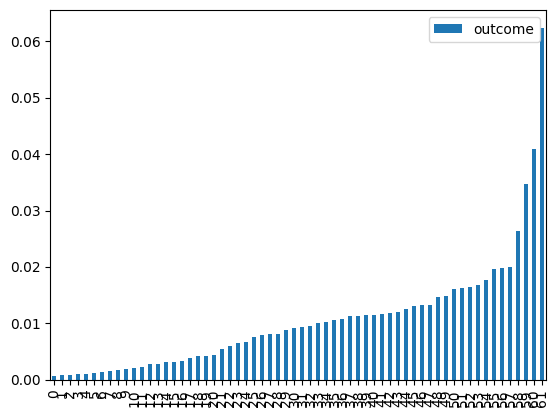

In [25]:
product_purchase_rate = (
    data.groupby("product_type")["outcome"].mean().sort_values().reset_index()
)
product_purchase_rate.plot(kind="bar")

print("Top 5", product_purchase_rate.head(5))
print("Back 5", product_purchase_rate.tail(5))

Data preparation for modeling

In [26]:
not_predicitve_cols = ["created_at", "order_date", "variant_id", "order_id", "user_id"]
y_col = "outcome"
feature_cols = [col for col in data.columns if col not in not_predicitve_cols + [y_col]]

categorical_cols = ["product_type", "vendor"]
data[categorical_cols].nunique()

product_type     62
vendor          264
dtype: int64

The categorical columns have a high number of unique categories, making one-hot encoding impractical.